In [2]:
from sklearn.svm import SVC
import numpy as np

In [7]:
X = np.array([[-1, -1],[-2, -1],[1,1],[2,1]])
Y = np.array([1,1,2,-2])

In [9]:
clf=SVC()
clf.fit(X,Y)
print(clf.fit(X,Y))
print(clf.predict([[-0.8, -1]]))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[1]


[[  0.   0.   7.  15.  13.   1.   0.   0.]
 [  0.   8.  13.   6.  15.   4.   0.   0.]
 [  0.   2.   1.  13.  13.   0.   0.   0.]
 [  0.   0.   2.  15.  11.   1.   0.   0.]
 [  0.   0.   0.   1.  12.  12.   1.   0.]
 [  0.   0.   0.   0.   1.  10.   8.   0.]
 [  0.   0.   8.   4.   5.  14.   9.   0.]
 [  0.   0.   7.  13.  13.   9.   0.   0.]]


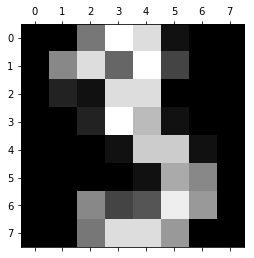

In [33]:
import pylab as pl
%matplotlib inline

digits = load_digits()
# 数据纬度，1797幅图，8*8  
# 显示一副图片  
pl.gray()  
print(digits.images[3])
pl.matshow(digits.images[3])  
pl.show() 

In [1]:
# -*- coding:utf-8 -*-  
import sys  
from sklearn.datasets import load_digits  # 加载手写数字识别数据  
import pylab as pl  
from sklearn.cross_validation import train_test_split  # 训练测试数据分割  
from sklearn.preprocessing import StandardScaler  # 标准化工具  
from sklearn.svm import LinearSVC  
from sklearn.metrics import classification_report  # 预测结果分析工具  
import cv2
import numpy as np
import scipy.io
import shutil
import xlrd
import h5py

/Users/victor/anaconda3/envs/tensorflow3.5cpuconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [3]:
data_dir = 'ImageSynthesis/4lesions/syn/'
data = xlrd.open_workbook('/Users/victor/Project4sxd/DRandDME/code/challenge/SubChallenge2-DRandDMEGrading/GROUNDTRUTH_LABELS/IDRiD_Training_Set.xlsx')
table = data.sheets()[0]          #通过索引顺序获取
nrows = table.nrows
print(nrows)
nameImage = table.col_values(0)

grayfat = []
DR_id = []
DME_id = []
for id in range(413):
    File_Img_Name = 'IDRiD_%03d.png' % (id+1)
    File_dir = data_dir + File_Img_Name
    src = cv2.imread(File_dir)
    src = cv2.resize(src, (536, 356), interpolation=cv2.INTER_NEAREST)
    graysrc = rgb2gray(src)
    print(id)

    grayfatarr = graysrc.flatten().tolist()
    grayfat.append(grayfatarr)
    
    DRGradingVale = table.cell(id+1,1).value
    DR_id.append(DRGradingVale)
    DMEGradingVale = table.cell(id+1,2).value
    DME_id.append(DMEGradingVale)

    
if DR_id:
    data1=np.array(grayfat)
    drgradingvalue1 = np.array(DR_id, dtype=np.int64)
    dmegradingvalue1 = np.array(DME_id, dtype=np.int64)
    
scipy.io.savemat('ImageSynthesis/4lesions/413Lesions1111.mat',
                 {'data':data1,'drgrading':drgradingvalue1,'dmegrading':dmegradingvalue1})  # 写入mat文件 
print("1")

414
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

In [18]:
data_dir = 'ImageSynthesis/4lesions/syn/'
data = xlrd.open_workbook('/Users/victor/Project4sxd/DRandDME/code/challenge/SubChallenge2-DRandDMEGrading/GROUNDTRUTH_LABELS/IDRiD_Training_Set.xlsx')
table = data.sheets()[0]          #通过索引顺序获取
nrows = table.nrows
print(nrows)
nameImage = table.col_values(0)

grayfat = []
DR_id = []
DME_id = []
for id in range(20):
    File_Img_Name = 'IDRiD_%03d.png' % (id+1)
    File_dir = data_dir + File_Img_Name
    src = cv2.imread(File_dir)
    graysrc = rgb2gray(src)

    grayfatarr = graysrc.flatten().tolist()
    grayfat.append(grayfatarr)
    
    DRGradingVale = table.cell(id+1,1).value
    DR_id.append(DRGradingVale)
    DMEGradingVale = table.cell(id+1,2).value
    DME_id.append(DMEGradingVale)

    
if DR_id:
    data1=np.array(grayfat)
    drgradingvalue1 = np.array(DR_id, dtype=np.int64)
    dmegradingvalue1 = np.array(DME_id, dtype=np.int64)
    
scipy.io.savemat('ImageSynthesis/4lesions/413Lesions20.mat',
                 {'data':data1,'drgrading':drgradingvalue1,'dmegrading':dmegradingvalue1})  # 写入mat文件 
print("1")

grayfat = []
DR_id = []
DME_id = []

for id in range(20,40):
    File_Img_Name = 'IDRiD_%03d.png' % (id+1)
    File_dir = data_dir + File_Img_Name
    src = cv2.imread(File_dir)
    graysrc = rgb2gray(src)
    grayfatarr = graysrc.flatten().tolist()
    grayfat.append(grayfatarr)
    
    DRGradingVale = table.cell(id+1,1).value
    DR_id.append(DRGradingVale)
    
    DMEGradingVale = table.cell(id+1,2).value
    DME_id.append(DMEGradingVale)
    
if DR_id:
    data2=np.array(grayfat)
    drgradingvalue2 = np.array(DR_id, dtype=np.int64)
    dmegradingvalue2 = np.array(DME_id, dtype=np.int64)
    
scipy.io.savemat('ImageSynthesis/4lesions/413Lesions40.mat',
                 {'data':data2,'drgrading':drgradingvalue2,'dmegrading':dmegradingvalue2})  # 写入mat文件 
print("2")

grayfat = []
DR_id = []
DME_id = []

for id in range(40,60):
    File_Img_Name = 'IDRiD_%03d.png' % (id+1)
    File_dir = data_dir + File_Img_Name
    src = cv2.imread(File_dir)
    graysrc = rgb2gray(src)
    
    grayfatarr = graysrc.flatten().tolist()
    grayfat.append(grayfatarr)
    
    DRGradingVale = table.cell(id+1,1).value
    DR_id.append(DRGradingVale)
    
    DMEGradingVale = table.cell(id+1,2).value
    DME_id.append(DMEGradingVale)
    
if DR_id:
    data3=np.array(grayfat)
    drgradingvalue3 = np.array(DR_id, dtype=np.int64)
    dmegradingvalue3 = np.array(DME_id, dtype=np.int64)
    
scipy.io.savemat('ImageSynthesis/4lesions/413Lesions60.mat',
                 {'data':data3,'drgrading':drgradingvalue3,'dmegrading':dmegradingvalue3})  # 写入mat文件 
print("3")

grayfat = []
DR_id = []
DME_id = []

for id in range(60,80):
    File_Img_Name = 'IDRiD_%03d.png' % (id+1)
    File_dir = data_dir + File_Img_Name
    src = cv2.imread(File_dir)
    graysrc = rgb2gray(src)
    
    grayfatarr = graysrc.flatten().tolist()
    grayfat.append(grayfatarr)
    
    DRGradingVale = table.cell(id+1,1).value
    DR_id.append(DRGradingVale)
    
    DMEGradingVale = table.cell(id+1,2).value
    DME_id.append(DMEGradingVale)
    
if DR_id:
    data4=np.array(grayfat)
    drgradingvalue4 = np.array(DR_id, dtype=np.int64)
    dmegradingvalue4 = np.array(DME_id, dtype=np.int64)
    
scipy.io.savemat('ImageSynthesis/4lesions/413Lesions80.mat',
                 {'data':data4,'drgrading':drgradingvalue4,'dmegrading':dmegradingvalue4})  # 写入mat文件 
print("4")

414
1
2
3
4


In [5]:
data_dir = 'ImageSynthesis/4lesions/syn/'
data = xlrd.open_workbook('/Users/victor/Project4sxd/DRandDME/code/challenge/SubChallenge2-DRandDMEGrading/GROUNDTRUTH_LABELS/IDRiD_Training_Set.xlsx')
table = data.sheets()[0]          #通过索引顺序获取
nrows = table.nrows
print(nrows)
nameImage = table.col_values(0)

grayfat = []
DR_id = []
DME_id = []
i = 21
for id in range(1,414):
    if id%20 == 0:
        File_Img_Name = 'IDRiD_%03d.png' % (id)
        File_dir = data_dir + File_Img_Name
        src = cv2.imread(File_dir)
        graysrc = rgb2gray(src)

        grayfatarr = graysrc.flatten().tolist()
        grayfat.append(grayfatarr)

        DRGradingVale = table.cell(id,1).value
        DR_id.append(DRGradingVale)
        DMEGradingVale = table.cell(id,2).value
        DME_id.append(DMEGradingVale)

        data1=np.array(grayfat)
        drgradingvalue1 = np.array(DR_id, dtype=np.int64)
        dmegradingvalue1 = np.array(DME_id, dtype=np.int64)
        
        i = i+1
        scipy.io.savemat('ImageSynthesis/4lesions/413Lesions_%02d.mat' % (i),
                         {'data':data1,'drgrading':drgradingvalue1,'dmegrading':dmegradingvalue1})  # 写入mat文件 
        print(i)
        grayfat = []
        DR_id = []
        DME_id = []
    elif id == 413:
        File_Img_Name = 'IDRiD_%03d.png' % (id)
        File_dir = data_dir + File_Img_Name
        src = cv2.imread(File_dir)
        graysrc = rgb2gray(src)

        grayfatarr = graysrc.flatten().tolist()
        grayfat.append(grayfatarr)

        DRGradingVale = table.cell(id,1).value
        DR_id.append(DRGradingVale)
        DMEGradingVale = table.cell(id,2).value
        DME_id.append(DMEGradingVale)

        data1=np.array(grayfat)
        drgradingvalue1 = np.array(DR_id, dtype=np.int64)
        dmegradingvalue1 = np.array(DME_id, dtype=np.int64)
        
        i = i+1
        scipy.io.savemat('ImageSynthesis/4lesions/413Lesions_%02d.mat' % (i),
                         {'data':data1,'drgrading':drgradingvalue1,'dmegrading':dmegradingvalue1})  # 写入mat文件 
        print(i)
        grayfat = []
        DR_id = []
        DME_id = []
    else:
        File_Img_Name = 'IDRiD_%03d.png' % (id)
        File_dir = data_dir + File_Img_Name
        src = cv2.imread(File_dir)
        graysrc = rgb2gray(src)

        grayfatarr = graysrc.flatten().tolist()
        grayfat.append(grayfatarr)

        DRGradingVale = table.cell(id,1).value
        DR_id.append(DRGradingVale)
        DMEGradingVale = table.cell(id,2).value
        DME_id.append(DMEGradingVale)

        data1=np.array(grayfat)
        drgradingvalue1 = np.array(DR_id, dtype=np.int64)
        dmegradingvalue1 = np.array(DME_id, dtype=np.int64)

414
22


In [43]:
if DR_id:
    #data1 = np.array(grayfat)
    data = np.stack(grayfat, axis=1)
    drgradingvalue = np.array(DR_id, dtype=np.int64)
    dmegradingvalue = np.array(DME_id, dtype=np.int64)
    
#data=np.array(grayfat)
file = h5py.File('ImageSynthesis/4lesions/413Lesions.h5','w')  
# 写入  
file.create_dataset('data',data)  
file.create_dataset('drgrading',drgradingvalue)  
file.create_dataset('dmegrading',dmegradingvalue)  
file.close()

TypeError: Can't convert element 0 ([ 0.  0.  0.  0.  0.]) to hsize_t

In [42]:
file.close()

In [6]:
mat1data = scipy.io.loadmat('ImageSynthesis/4lesions/413Lesions_21.mat')
grayfat1 = mat1data['data']
drgrading1 = mat1data['drgrading']
dmegrading1 = mat1data['dmegrading']

print(grayfat1.shape)
print(drgrading1)
print(drgrading1.dtype)
print(dmegrading1)
print(dmegrading1.dtype)

(13, 12212224)
[[2 1 1 2 2 0 2 1 2 2 2 2 2]]
int64
[[1 0 0 0 1 0 1 0 1 0 0 0 0]]
int64


In [8]:
data1 = scipy.io.loadmat('ImageSynthesis/4lesions/413Lesions2222.mat')
data2 = scipy.io.loadmat('ImageSynthesis/4lesions/413Lesions2223.mat')
grayfat1 = data1['data']
drgrading1 = data1['drgrading']
dmegrading1 = data1['dmegrading']

grayfat2 = data2['data']
drgrading2 = data2['drgrading']
dmegrading2 = data2['dmegrading']

#newgrayfat = np.stack(grayfat1,grayfat2)
newgrayfat = np.concatenate((grayfat1,grayfat2),axis=0)
print(newgrayfat)
print(newgrayfat.shape)

newdrgrading = np.append(drgrading1,drgrading2)
print(newdrgrading)
print(newdrgrading.shape)

newdmegrading = np.append(dmegrading1,dmegrading2)
print(newdmegrading)
print(newdmegrading.shape)


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(413, 763264)
[3 3 2 3 4 4 4 4 3 4 3 3 3 4 4 2 4 2 2 2 1 4 3 4 3 3 4 4 2 4 4 4 4 3 3 3 2
 2 3 3 2 2 2 2 2 4 2 2 3 2 2 2 4 4 3 2 3 2 2 2 2 4 2 2 3 3 4 2 2 4 2 2 2 2
 3 2 3 2 1 2 4 2 2 2 2 4 2 3 4 4 2 2 2 2 3 4 2 3 3 4 3 2 2 4 1 2 2 3 2 3 4
 3 2 3 3 2 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 3 0 0 2 0 2
 2 2 2 4 0 2 3 0 1 0 2 0 1 0 0 2 0 1 0 0 0 3 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0
 0 4 0 0 0 0 0 0 2 2 0 0 0 2 2 0 4 4 2 2 0 0 2 4 2 2 0 0 0 2 3 4 0 1 0 0 0
 2 2 2 2 0 1 1 0 0 3 2 3 4 0 0 0 0 3 3 1 2 2 2 2 2 4 4 0 0 4 1 1 0 2 2 0 3
 0 0 3 2 1 1 2 1 0 3 0 3 3 2 2 0 4 3 0 0 0 0 2 3 3 2 3 3 2 2 3 2 3 3 0 2 2
 3 0 0 2 2 3 2 3 0 2 3 0 0 3 2 3 2 0 0 0 3 0 3 3 0 0 2 4 4 2 3 0 3 0 3 3 0
 3 3 0 2 2 3 3 0 1 3 0 0 3 3 3 0 0 1

In [7]:
data1 = scipy.io.loadmat('ImageSynthesis/4lesions/413Lesions_01.mat')
grayfat1 = data1['data']
drgrading1 = data1['drgrading']
dmegrading1 = data1['dmegrading']
for i in range(2,22):
    data2 = scipy.io.loadmat('ImageSynthesis/4lesions/413Lesions_%02d.mat' % i )
    grayfat2 = data2['data']
    drgrading2 = data2['drgrading']
    dmegrading2 = data2['dmegrading']
    grayfat1 = np.concatenate((grayfat1,grayfat2),axis=0)
    drgrading1 = np.append(drgrading1,drgrading2)
    dmegrading1 = np.append(dmegrading1,dmegrading2)
    print(i)
    
print(grayfat1.shape)
print(drgrading1)
print(drgrading1.shape)
print(dmegrading1)
print(dmegrading1.shape)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
(413, 12212224)
[3 3 2 3 4 4 4 4 3 4 3 3 3 4 4 2 4 2 2 2 1 4 3 4 3 3 4 4 2 4 4 4 4 3 3 3 2
 2 3 3 2 2 2 2 2 4 2 2 3 2 2 2 4 4 3 2 3 2 2 2 2 4 2 2 3 3 4 2 2 4 2 2 2 2
 3 2 3 2 1 2 4 2 2 2 2 4 2 3 4 4 2 2 2 2 3 4 2 3 3 4 3 2 2 4 1 2 2 3 2 3 4
 3 2 3 3 2 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 3 0 0 2 0 2
 2 2 2 4 0 2 3 0 1 0 2 0 1 0 0 2 0 1 0 0 0 3 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0
 0 4 0 0 0 0 0 0 2 2 0 0 0 2 2 0 4 4 2 2 0 0 2 4 2 2 0 0 0 2 3 4 0 1 0 0 0
 2 2 2 2 0 1 1 0 0 3 2 3 4 0 0 0 0 3 3 1 2 2 2 2 2 4 4 0 0 4 1 1 0 2 2 0 3
 0 0 3 2 1 1 2 1 0 3 0 3 3 2 2 0 4 3 0 0 0 0 2 3 3 2 3 3 2 2 3 2 3 3 0 2 2
 3 0 0 2 2 3 2 3 0 2 3 0 0 3 2 3 2 0 0 0 3 0 3 3 0 0 2 4 4 2 3 0 3 0 3 3 0
 3 3 0 2 2 3 3 0 1 3 0 0 3 3 3 0 0 1 4 4 2 4 0 4 0 0 2 2 0 0 2 1 1 2 2 0 2
 1 2 2 2 2 2]
(413,)
[2 2 2 2 0 1 0 2 2 1 1 2 0 2 2 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1
 0 2 2 2 2 

In [ ]:
aa = grayfat1.tolist()

In [ ]:
#aa = grayfat1.tolist()
file = h5py.File('ImageSynthesis/4lesions/413Lesions.h5','w')  
# 写入  
file.create_dataset('data',aa)  
file.close()

In [ ]:
file.close()

In [10]:
data = newgrayfat
target = newdrgrading
target_names=np.array([0,1,2,3,4])

In [9]:
def load_IDRiD():
    grayfat = []
    data_dir = 'ImageSynthesis/4lesions/syn/'
#     matdata = scipy.io.loadmat('ImageSynthesis/4lesions/413Lesions20.mat')
#     grayfat1 = matdata['data']
#     print(grayfat1.shape)
#     target = matdata['drgrading']
#     print(target)
#     dmegrading1 = matdata['dmegrading']
#     for id in range(30):
#         File_Img_Name = 'IDRiD_%03d.png' % (id+1)
#         File_dir = data_dir + File_Img_Name
#         #print(File_dir)
#         src = cv2.imread(File_dir)
#         graysrc = rgb2gray(src)
# #         print(type(graysrc))
# #         print(graysrc.shape)
# #         print(graysrc.dtype)
#         #print(src1[id])
#         grayfatarr = graysrc.flatten().tolist()
#         grayfat.append(grayfatarr)
#         #src1[id] = src2
#         #print(src1.shape)
#         #print(grayfat[id])
#         print(id)
        
    grayfat1=np.array(grayfat)
    target_names=np.array([0,1,2,3,4])
    target=np.array([1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0])
    return grayfat1,target,target_names

In [13]:
a=np.array(grayfat)
print(a[1])

[ 0.  0.  0. ...,  0.  0.  0.]


In [10]:
data,target,target_names = load_IDRiD()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.33, random_state=33)

In [15]:
IDRiD = load_IDRiD()
# 分割数据
X_train, X_test, Y_train, Y_test = train_test_split(IDRiD.data, IDRiD.target, test_size=0.25, random_state=33)

<class 'numpy.ndarray'>
(2848, 4288)
float64
<class 'numpy.ndarray'>
(2848, 4288)
float64
<class 'numpy.ndarray'>
(2848, 4288)
float64
<class 'numpy.ndarray'>
(2848, 4288)
float64
<class 'numpy.ndarray'>
(2848, 4288)
float64
<class 'numpy.ndarray'>
(2848, 4288)
float64
<class 'numpy.ndarray'>
(2848, 4288)
float64
<class 'numpy.ndarray'>
(2848, 4288)
float64
<class 'numpy.ndarray'>
(2848, 4288)
float64
<class 'numpy.ndarray'>
(2848, 4288)
float64


NameError: name 'Bunch' is not defined

In [85]:
digits = load_digits()
# 数据纬度，1797幅图，8*8
#print(digits)
print(type(digits.data))
print(digits.data.shape)

print(digits.data[3])
print(type(digits.data[3]))
print(digits.data[3].dtype)

print(digits.target[1])


<class 'numpy.ndarray'>
(1797, 64)
[  0.   0.   7.  15.  13.   1.   0.   0.   0.   8.  13.   6.  15.   4.   0.
   0.   0.   2.   1.  13.  13.   0.   0.   0.   0.   0.   2.  15.  11.   1.
   0.   0.   0.   0.   0.   1.  12.  12.   1.   0.   0.   0.   0.   0.   1.
  10.   8.   0.   0.   0.   8.   4.   5.  14.   9.   0.   0.   0.   7.  13.
  13.   9.   0.   0.]
<class 'numpy.ndarray'>
float64
1


In [14]:
ss = StandardScaler()
# fit是实例方法，必须由实例调用
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lsvc = LinearSVC()
lsvc.fit(X_train, Y_train)

Y_predict = lsvc.predict(X_test)

print(classification_report(Y_test, Y_predict, target_names=target_names.astype(str)))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

             precision    recall  f1-score   support

          0       0.44      1.00      0.61        44
          1       0.17      0.20      0.18         5
          2       0.55      0.13      0.21        46
          3       0.30      0.10      0.15        30
          4       0.11      0.08      0.10        12

avg / total       0.40      0.40      0.31       137



In [16]:
def svm_cross_validation(train_x, train_y):  
    from sklearn.grid_search import GridSearchCV  
    from sklearn.svm import SVC  
    model = SVC(kernel='rbf', probability=True)  
    param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}  
    grid_search = GridSearchCV(model, param_grid, n_jobs = 1, verbose=1)  
    grid_search.fit(train_x, train_y)  
    best_parameters = grid_search.best_estimator_.get_params()  
    for para, val in best_parameters.items():  
        print(para, val)  
    model = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True)  
    model.fit(train_x, train_y)  
    return model  

In [20]:
num_train, num_feat = X_train.shape  
num_test, num_feat = X_test.shape  
is_binary_class = (len(np.unique(Y_train)) == 2)  

In [28]:
test_classifiers = ['NB', 'KNN', 'LR', 'RF', 'DT', 'SVM','SVMCV', 'GBDT']  
classifiers = {#'NB':naive_bayes_classifier,  
              #'KNN':knn_classifier,  
              # 'LR':logistic_regression_classifier,  
              # 'RF':random_forest_classifier,  
              # 'DT':decision_tree_classifier,  
             # 'SVM':svm_classifier,  
            'SVMCV':svm_cross_validation,  
             #'GBDT':gradient_boosting_classifier  
}  

In [ ]:
import time 
import pickle as pickle  
model_save_file = None 
start_time = time.time()  
model = classifiers['SVMCV'](X_train, Y_train)  
print('training took %fs!' % (time.time() - start_time))
predict = model.predict(test_x)  
if model_save_file != None:  
    model_save['SVMCV'] = model  
if is_binary_class:  
    precision = metrics.precision_score(Y_test, predict)  
    recall = metrics.recall_score(Y_test, predict)  
    print('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))
accuracy = metrics.accuracy_score(Y_test, predict)  
print('accuracy: %.2f%%' % (100 * accuracy)) 

/Users/victor/anaconda3/envs/tensorflow3.5cpuconda/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 14 candidates, totalling 42 fits
